# Lab Assignment 6
provided by:
- <b>Saeed Mohammadi</b> SMU ID# <b>47509206</b>
- <b>Niraj Verma</b> SMU ID# <b>47510753</b>
- <b>Michael Xu</b> SMU ID# <b>40303111</b>
- <b>Mohamed Elsaied</b> SMU ID# <b>47288466</b>
<br> Fall 2018
<br> Machine Learning for Python Course

<b>[15 points]</b> Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.

<b>[15 points]</b> Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Convince me that your cross validation method is a realistic mirroring of how an algorithm would be used in practice.

<b>[15 points]</b> Create a convolutional neural network to use on your data using Keras. Setup the training to use data expansion in Keras. Explain why the chosen data expansion techniques are appropriate for your dataset. 

<b>[20 points]</b> Investigate at least two different convolutional network architectures (and investigate changing some parameters of each architecture). Use the method of cross validation and evaluation metric that you argued for at the beginning of the lab. Visualize the performance of the training and validation sets per iteration (use the "history" parameter of Keras).

<b>[15 points]</b> Visualize the final results of the CNNs and interpret the performance. Use proper statistics as appropriate, especially for comparing models. 

<b>[10 points]</b> Compare the performance of your convolutional network to a standard multi-layer perceptron (MLP) using the receiver operating characteristic and area under the curve. Use proper statistical comparison techniques.  

Exceptional Work <b>(10 points total)</b>: Use transfer learning to pre-train the weights of your initial layers of your CNN. Compare the performance when using transfer learning to training from scratch in terms of classification performance. 


# Business Understanding

<b> Overview: </b> This dataset is more than 30k images of single orgasm/entity planktons, collected by Oregon State University's Hatfield Marine Science Center. The purpose of collection of this dataset is to develop an algorithm that can assign class probabilities (based on the species of theorganism) to any given image of planktons' organism. To create this dataset, this center has collected 50 million of plankton images during 18 days of May-June 2014 in Florida. They have utilized an underwater imaging system which captures a high resolution 2048 X 2048 pixels image. Then, in a separate procedure extracted important parts of the images that they want to classify, therefore the images that we are going to work are smaller images extracted from the raw image. Then the experts of the center has assigned classes to a huge number of images and created the train dataset. Each image is classified by up to five people, therefore there is a high confidency in the classification of the train dataset. 
In order to define classes of organisms the scientists has utilised their own knowledge and different concepts such as motion of that organism, but, there might be some morphological and biological connections between different classes. Also, some of the classes together shape a bigger group. Totally, there are 121 classes defined.

<b> Importance: </b> Measuring the population of planktons have always been a challenging and time consuming task for scientists, while knowing the population of them is a critical factor that describes the health of ecosystem, as a consequence of their significant role in the ecological cycle of he earth. Planktons are one of the primary food sources for marine animals and therefore human, some types of them that typically have a small size, produce oxygen (phytoplanktons), they provide biomedical products and destroy carbon dioxide. Another importance that they have, just like all other species on the earth, is that they sustain they biodiversity. Knowing their importance in keeping the environment sustainable we should keep an eye on their population to prevent their degredataion or making them endangered. 
Scientists has always used underwater sensors to measure them, but with the advancements of thecnology, now they capture images and count them. The caounting process in the images and the manual procedures to classify the planktons in the images is a time consuming process, if a machine learning algorithm can be developed to do that instead of using human resources, would be a significant progress and saving of effort.

<b>Target</b>: Assigns class probabilities to a given image.

Measure of Success: We are expecting to get the probability of more than <b>1/6</b> for the correct class for each image and other classes (wrong classes) should have lower probability.

# Data Preparation

In the provided data each picture is in a folder named with the plankton species. In this project the plankton species should be predicted. Therefore, a database indlucing the picture data and name of the folder is required for this project. In this section a list of arrays is generated using the pictures data and name of the corresponding folder is generated. Images data are linearized to generatea one dimension feature. Therefore each row includes information of the image and the target feature for that image.
Size of provided images from Oregon State University’s Hatfield Marine Science Center are different. Shape of the images should be same. There are lots of ways to do that. We have decided to use the size 40 by 40 pixels. Since we have more than 30k Images, Images larger than 40 by 40 pixels are used in our project. All the images larger than 40 by 40 are resized and the final data includes 22297 images with the size 40 by 40.

In [134]:
# DO NOT RUN THIS CODE !!

# recursively extracted data from folders
# please proceed to next part as this was done just to extract data as data.npy

"""import os
import matplotlib.image as mpimg
import sys
import numpy as np
from PIL import Image
X,y=[],[]
def search_deep(n_path,func,args=[],ref=1):
        try:
                for i in os.listdir(n_path):
                        if os.path.isdir(n_path+'/'+i):
                                search_deep(n_path+'/'+i,func,args,ref)
                        else:
                                if ref:
                                        for j in args:
                                                if j==i[-len(j):]:
                                                        func(n_path+'/'+i)
                                else:
                                        for j in args:
                                                if j in i:
                                                        func(n_path+'/'+i)
        except OSError:
                 func(n_path)
                #raise Exception('Not a directory ')
                
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def func(path):
    global X,y
    img = Image.open(path)
    h,w=img.size
    #print (h,w)
    if h>223 and w>223:
        img=img.resize((224,224))
        #img = rgb2gray(img)
        data = np.asarray( img, dtype="float64" )
        #data=data.reshape((40*40,))
        name=path.split('/')[1]
        y.append(name)
        X.append(data)
    else:
        print ('Data rejected for',path,'with size',h,w)
if __name__=='__main__':
    search_deep('.',func,['.png'])
    d={'features':X,'labels':y}
    d['features']=np.array(d['features'])
    d['labels']=np.array(d['labels'])
    np.save('data.npy',d)"""

'import os\nimport matplotlib.image as mpimg\nimport sys\nimport numpy as np\nfrom PIL import Image\nX,y=[],[]\ndef search_deep(n_path,func,args=[],ref=1):\n        try:\n                for i in os.listdir(n_path):\n                        if os.path.isdir(n_path+\'/\'+i):\n                                search_deep(n_path+\'/\'+i,func,args,ref)\n                        else:\n                                if ref:\n                                        for j in args:\n                                                if j==i[-len(j):]:\n                                                        func(n_path+\'/\'+i)\n                                else:\n                                        for j in args:\n                                                if j in i:\n                                                        func(n_path+\'/\'+i)\n        except OSError:\n                 func(n_path)\n                #raise Exception(\'Not a directory \')\n                \ndef rgb2gray

Our data is available now. From now on we need to read "data.npy" instead of reading all the images. It can be done as follows. Here, we grouped planktons based on their classes (we are predicting their classes rather than their names, which means the number of class is from 121 to 16).

#  Data Evaluation

##  Metrics measurement

**Which method/ratio?**


**accuracy score**

Since there is no class imbalance and we are not senstive to any of the classes, it's totally fine to use accuracy as our metrics measurment



##  Cross Validation method

Our data set is unique, since it has a time series effect, and it has class imbalance problem in it. Since time series is out of the scope of this lab and we want to make our life easier, we will just deal with the class imbalance problem and assume that there is no time series effect, which means that the flight delays are independent of each other and the delay of a specific flight doesn't give any additional information of the delay of any other flight. But realistically this assumption is totally fine, since the flights are mainly delayed because of the security, aircraft, and airlne delays from the origin and rarely from the destinantion. so we think it's a very rasonable assumption to take.


For the method of dividing the training and testing data, we believe this is the most important key for a succesful deployment of a machine learning algorithm, since there is alot of data now a day, any machine learning project will be trained on a sample of the desired population. assuming that the sample is representitve of the population, we want to make sure we are learning from the data not memorizing! in order to expplain this, let's assume a situation where in a machine learning class the students have a midterm and the professor has given the students 3 page notes that summarizes what will be in the midterm. If the midterm is exactly from the 3 page notes, that is what we call overfit(low bias, high variance). if it's completely different they will have a simple approach and that underfit(low variance, high bias). if it's some how similar to the notes but different at the same time, we will have a perfect fit(sweet spot of the bias variance tradeoff)! this is a really good visualization of the situation we described



<img src="https://raw.githubusercontent.com/M-Elsaied/NYC-Taxi-Analysis/master/data/Visualization/fitting.png" alt="FittingCurves" width="800" height="600" title="FittingCurves">

So what we want is to help the algorithm to understand the data and not memorize it, so if we do a simple train, test split the model can overfit or underfit, depending on what is in the training set.

In order to solve the bias-variance trade off we can use the Kfold cross validation, which sample without replacment into Kfolds and thus have k-1 train and the test set would be the kth fold and then can run k models on the k folds and then take the average of these models, this way we have a stable, and consistent model(It's the same idea of ensembles, but the only difference that it aggregates the same model on different folds of the data by thaking the average and it usually decreases the variance)!
Beside that, it's a really powerful tool for the hyperparameters tuning via grid search.

For the number of K folds, it's a bias-variance tradeoff where after alot of simulations by Trevor Hestie & Rob Tibsharani, it appears that k between 5 and 10 is the best number as shown in the figure below(figure from ISL chapter 5)

<img src="https://raw.githubusercontent.com/M-Elsaied/NYC-Taxi-Analysis/master/data/Visualization/kfold.PNG" alt="FittingCurves" width="600" height="400" title="FittingCurves">

There is also emperical evidence that shows a good standard for value of k is 10, where experiments by Ron Kohavi on various real-world datasets suggest the 10-fold cross-validation offers the best bias-variance tradeoff.

Given all of this we have choosen 5-fold stratified cross validation for computational resource. We assumed that there is no class imbalance, but stratified kfold works the same as kfold when there is no class imbalance so that's why we are using it(and because we are too lazy to change the code from previous lab)


In [135]:
import numpy as np
d=np.load('C:/Users/micha/Desktop/SMU School Stuff/2018 Fall/CSCE 7324/MachineLearningNotebooks/project6/data.npy').item()
X=d['features']
y=d['labels']
y[y=='acantharia_protist']='PROTISTS'
y[y=='acantharia_protist_big_center']='PROTISTS'
y[y=='acantharia_protist_halo']='PROTISTS'
y[y=='protist_noctiluca']='PROTISTS'
y[y=='protist_other']='PROTISTS'
y[y=='protist_star']='PROTISTS'
y[y=='protist_fuzzy_olive']='PROTISTS'
y[y=='protist_dark_center']='PROTISTS'
y[y=='radiolarian_colony']='PROTISTS'
y[y=='radiolarian_chain']='PROTISTS'
y[y=='trichodesmium_bowtie']='TRICHODESMIUM'
y[y=='trichodesmium_multiple']='TRICHODESMIUM'
y[y=='trichodesmium_puff']='TRICHODESMIUM'
y[y=='trichodesmium_tuft']='TRICHODESMIUM'
y[y=='diatom_chain_string']='DIATOMS'
y[y=='diatom_chain_tube']='DIATOMS'
y[y=='jellies_tentacles']='GELATINOUS_ZOOPLANKTON'
y[y=='ephyra']='GELATINOUS_ZOOPLANKTON'
y[y=='ctenophore_cestid']='GELATINOUS_ZOOPLANKTON'
y[y=='ctenophore_cydippid_tentacles']='GELATINOUS_ZOOPLANKTON'
y[y=='ctenophore_cydippid_no_tentacles']='GELATINOUS_ZOOPLANKTON'
y[y=='ctenophore_lobate']='GELATINOUS_ZOOPLANKTON'
y[y=='hydromedusae_narcomedusae']='GELATINOUS_ZOOPLANKTON'
y[y=='hydromedusae_narco_dark']='GELATINOUS_ZOOPLANKTON'
y[y=='hydromedusae_solmundella']='GELATINOUS_ZOOPLANKTON'
y[y=='hydromedusae_solmaris']='GELATINOUS_ZOOPLANKTON'
y[y=='hydromedusae_narco_young']='GELATINOUS_ZOOPLANKTON'
y[y=='hydromedusae_liriope']='GELATINOUS_ZOOPLANKTON'
y[y=='hydromedusae_aglaura']='GELATINOUS_ZOOPLANKTON'
y[y=='hydromedusae_haliscera']='GELATINOUS_ZOOPLANKTON'
y[y=='hydromedusae_haliscera_small_sideview']='GELATINOUS_ZOOPLANKTON'
y[y=='hydromedusae_partial_dark']='GELATINOUS_ZOOPLANKTON'
y[y=='hydromedusae_bell_and_tentacles']='GELATINOUS_ZOOPLANKTON'
y[y=='hydromedusae_other']='GELATINOUS_ZOOPLANKTON'
y[y=='siphonophore_other_parts']='GELATINOUS_ZOOPLANKTON'
y[y=='siphonophore_physonect']='GELATINOUS_ZOOPLANKTON'
y[y=='siphonophore_physonect_young']='GELATINOUS_ZOOPLANKTON'
y[y=='siphonophore_calycophoran_abylidae']='GELATINOUS_ZOOPLANKTON'
y[y=='siphonophore_calycophoran_rocketship_young']='GELATINOUS_ZOOPLANKTON'
y[y=='siphonophore_calycophoran_sphaeronectes']='GELATINOUS_ZOOPLANKTON'
y[y=='siphonophore_calycophoran_sphaeronectes_young']='GELATINOUS_ZOOPLANKTON'
y[y=='siphonophore_calycophoran_sphaeronectes_stem']='GELATINOUS_ZOOPLANKTON'
y[y=='appendicularian_fritillaridae']='GELATINOUS_ZOOPLANKTON'
y[y=='appendicularian_slight_curve']='GELATINOUS_ZOOPLANKTON'
y[y=='appendicularian_straight']='GELATINOUS_ZOOPLANKTON'
y[y=='tunicate_doliolid']='GELATINOUS_ZOOPLANKTON'
y[y=='tunicate_doliolid_nurse']='GELATINOUS_ZOOPLANKTON'
y[y=='tunicate_partial']='GELATINOUS_ZOOPLANKTON'
y[y=='tunicate_salp_chains']='GELATINOUS_ZOOPLANKTON'
y[y=='tunicate_salp']='GELATINOUS_ZOOPLANKTON'
y[y=='appendicularian_s_shape']='GELATINOUS_ZOOPLANKTON'
y[y=='hydromedusae_h15']='GELATINOUS_ZOOPLANKTON'
y[y=='hydromedusae_shapeA']='GELATINOUS_ZOOPLANKTON'
y[y=='hydromedusae_shapeA_sideview_small']='GELATINOUS_ZOOPLANKTON'
y[y=='hydromedusae_shapeB']='GELATINOUS_ZOOPLANKTON'
y[y=='hydromedusae_sideview_big']='GELATINOUS_ZOOPLANKTON'
y[y=='hydromedusae_typeD']='GELATINOUS_ZOOPLANKTON'
y[y=='hydromedusae_typeD_bell_and_tentacles']='GELATINOUS_ZOOPLANKTON'
y[y=='hydromedusae_typeE']='GELATINOUS_ZOOPLANKTON'
y[y=='hydromedusae_typeF']='GELATINOUS_ZOOPLANKTON'
y[y=='siphonophore_calycophoran_rocketship_adult']='GELATINOUS_ZOOPLANKTON'
y[y=='siphonophore_partial']='GELATINOUS_ZOOPLANKTON'
y[y=='fish_larvae_leptocephali']='FISH'
y[y=='fish_larvae_myctophids']='FISH'
y[y=='fish_larvae_very_thin_body']='FISH'
y[y=='fish_larvae_thin_body']='FISH'
y[y=='fish_larvae_medium_body']='FISH'
y[y=='fish_larvae_deep_body']='FISH'
y[y=='copepod_calanoid']='CRUSTACEANS'
y[y=='copepod_other']='CRUSTACEANS'
y[y=='copepod_calanoid_small_longantennae']='CRUSTACEANS'
y[y=='copepod_calanoid_frillyAntennae']='CRUSTACEANS'
y[y=='copepod_calanoid_flatheads']='CRUSTACEANS'
y[y=='copepod_calanoid_eggs']='CRUSTACEANS'
y[y=='copepod_calanoid_octomoms']='CRUSTACEANS'
y[y=='copepod_calanoid_large']='CRUSTACEANS'
y[y=='copepod_calanoid_large_side_antennatucked']='CRUSTACEANS'
y[y=='copepod_calanoid_eucalanus']='CRUSTACEANS'
y[y=='crustacean_other']='CRUSTACEANS'
y[y=='amphipods']='CRUSTACEANS'
y[y=='shrimp-like_other']='CRUSTACEANS'
y[y=='euphausiids_young']='CRUSTACEANS'
y[y=='euphausiids']='CRUSTACEANS'
y[y=='shrimp_zoea']='CRUSTACEANS'
y[y=='decapods']='CRUSTACEANS'
y[y=='shrimp_caridean']='CRUSTACEANS'
y[y=='shrimp_sergestidae']='CRUSTACEANS'
y[y=='copepod_cyclopoid_copilia']='CRUSTACEANS'
y[y=='copepod_cyclopoid_oithona']='CRUSTACEANS'
y[y=='copepod_cyclopoid_oithona_eggs']='CRUSTACEANS'
y[y=='stomatopod']='CRUSTACEANS'
y[y=='chaetognath_sagitta']='CHAETOGNATHS'
y[y=='chaetognath_non_sagitta']='CHAETOGNATHS'
y[y=='chaetognath_other']='CHAETOGNATHS'
y[y=='pteropod_butterfly']='GASTROPODS'
y[y=='pteropod_theco_dev_seq']='GASTROPODS'
y[y=='pteropod_triangle']='GASTROPODS'
y[y=='heteropod']='GASTROPODS'
y[y=='trochophore_larvae']='OTHER_INVERT_LARVAE'
y[y=='echinoderm_larva_seastar_bipinnaria']='OTHER_INVERT_LARVAE'
y[y=='echinoderm_larva_seastar_brachiolaria']='OTHER_INVERT_LARVAE'
y[y=='echinoderm_seacucumber_auricularia_larva']='OTHER_INVERT_LARVAE'
y[y=='echinoderm_larva_pluteus_early']='OTHER_INVERT_LARVAE'
y[y=='echinopluteus']='OTHER_INVERT_LARVAE'
y[y=='invertebrate_larvae_other_A']='OTHER_INVERT_LARVAE'
y[y=='invertebrate_larvae_other_B']='OTHER_INVERT_LARVAE'
y[y=='tornaria_acorn_worm_larvae']='OTHER_INVERT_LARVAE'
y[y=='echinoderm_larva_pluteus_brittlestar']='OTHER_INVERT_LARVAE'
y[y=='echinoderm_larva_pluteus_typeC']='OTHER_INVERT_LARVAE'
y[y=='echinoderm_larva_pluteus_urchin']='OTHER_INVERT_LARVAE'
y[y=='fecal_pellet']='DETRITUS'
y[y=='detritus_blob']='DETRITUS'
y[y=='detritus_filamentous']='DETRITUS'
y[y=='detritus_other']='DETRITUS'
y[y=='unknown_blobs_and_smudges']='UNKNOWN'
y[y=='unknown_sticks']='UNKNOWN'
y[y=='unknown_unclassified']='UNKNOWN'

X = X.astype(np.float32)/255.
print (X[0])
print (np.unique(y))

[[1. 1. 1. ... 1. 1. 1.]]
['CHAETOGNATHS' 'CRUSTACEANS' 'DETRITUS' 'DIATOMS' 'FISH' 'GASTROPODS'
 'GELATINOUS_ZOOPLANKTON' 'OTHER_INVERT_LARVAE' 'PROTISTS' 'TRICHODESMIUM'
 'UNKNOWN' 'artifacts' 'artifacts_edge' 'chordate_type1' 'polychaete']


We checked the Hatfield Marine Science Center and we found that the following 5 classes are the most critical to predict with the 6th classes as unknown. So we subset the data again to use only these 6 classes

In [136]:
index=[]
for i in range (len(y)):
    
    if y[i] in ['artifacts', 'artifacts_edge', 'chordate_type1', 'polychaete','UNKNOWN','DIATOMS', 'GASTROPODS', 'FISH', 'GELATINOUS_ZOOPLANKTON']:
        #print (y[i])
        index.append(i)

#print (index)
y=np.delete(y,index)
X=np.array([X[i] for i in range (len(X)) if i not in index])
#X=np.delete(X,index)
X=X.reshape((len(X),1600))
print (X.shape)

(14124, 1600)


d = {}
for i in y:
    if i not in d:
        d[i] = 1
    else:
        d[i]+=1
        
print (d)


As you see number of six classes of output that have more than 1000 samples are used for this classification job. Since this dataset was really hard to classify we had no other choice. We have checked the Kaggle page and our answers are reasonable in case of accuracy. We did not have the option of sampling from other features to make them balanced (Removed classes of output have less than 200 samples which will not affect our output like the "Unknown" class). Number of images after cleaning data are about 13K.

Since we have no imbalance in different classes of output after selecting features, accuracy score could be used in as a measurement of a success. 

## Measurement of success

The baseline method is doing better than the random chance which is 16.7%. But we will have a higher bar of only deploying our model if and only if it's better than 70%.

In [138]:

X = np.array(X)
X = X.reshape((-1,40,40,1))
print (X.shape)

(14124, 40, 40, 1)


In [139]:
names = y
n_samples, n_features_x,n_features_y,channels = X.shape
n_classes = len(np.unique(names))
h,w=n_features_x,n_features_y
print(np.sum(~np.isfinite(X)))
print("n_samples: {}".format(n_samples))
print("n_features_x: {}".format(n_features_x))
print("n_features_y: {}".format(n_features_y))
print("Channels: {}".format(channels))
print("n_classes: {}".format(n_classes))
print("Original Image Sizes {} by {}".format(h,w))

0
n_samples: 14124
n_features_x: 40
n_features_y: 40
Channels: 1
n_classes: 6
Original Image Sizes 40 by 40


Lets see some of the planktons. 18 planktons are randomely selected from the data and shown below. As you see planktons could have variety of shapes.

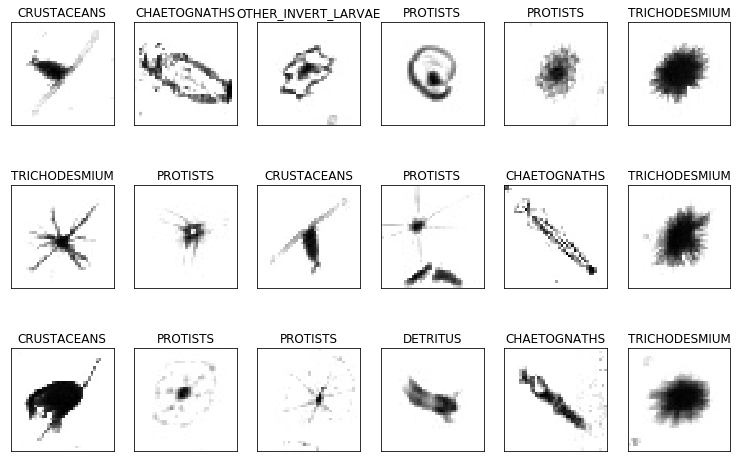

In [140]:
%matplotlib inline
from matplotlib import pyplot as plt
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
index = np.asarray(np.floor(np.random.rand(1,18)*n_samples))
index = index.astype(int)
sX = (X[index])
snames = (names[index])
plot_gallery(sX[0], snames[0], h, w)

In [141]:
import keras
y_dict = {}
y_cat = []
count = 0
names_dict = {}
for i in range (len(y)):
    if y[i] not in names_dict:
        y_dict[count] = y[i]
        y_cat.append(count)
        names_dict[y[i]] = count
        count+=1
    else:
        y_cat.append(names_dict[y[i]])
y_cat = np.array(y_cat)
#X=np.delete(X,index)
#X=X.reshape((len(X),1600))
y_ohe = keras.utils.to_categorical(y_cat, n_classes)
print (y_ohe.shape)

(14124, 6)


In [142]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow import set_random_seed


# Split it into train / test subsets
X_train, X_test, y_train_ohe, y_test_ohe = train_test_split(X, y_ohe, test_size=0.2)

# Split X_train again to create validation data
#X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2)
y_test = np.round(np.argmax(y_test_ohe,axis=1))
y_train = np.round(np.argmax(y_train_ohe,axis=1))
X_train.shape

(11299, 40, 40, 1)

We have <b>14124</b> images with size 40 by 40 which makes 1600 features in total for each image. We deleted some of the data (around 280) as they were very few in number and our prior studies showed them as outliners. Now we have <b>11299</b> images. 

In [143]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
from skimage.io import imshow
import seaborn as sns
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.layers import average 
from keras.models import Input, Model
from keras.layers import average, concatenate
from keras.models import Input, Model
from keras.callbacks import EarlyStopping
from keras.regularizers import l2 
from sklearn.metrics import accuracy_score
%matplotlib inline

def summarize_net(net, X_test, y_test, title_text=''):
    plt.figure(figsize=(15,5))
    yhat = np.argmax(net.predict(X_test), axis=1)
    #print (y_test.shape,yhat.shape)
    acc = mt.accuracy_score(y_test,yhat)
    cm = mt.confusion_matrix(y_test,yhat)
    cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f')
    plt.title(title_text+'{:.4f}'.format(acc))
    return cm

In this database we are predicting types of planktons that could be rotated or moved over time. That is, if we want to generate picture of different planktons in different times we can shift the picture or rotate them. Also depending on which side of plankton that we are taking picture their shape could be fliped. That is, we have decided to use flip pictures horizontally in our image data generator. We did not use other features of the image data generator since it did not make much sense in our database. Using this function we can have as many perturbed samples as we want to train our model.

In [144]:
datagen = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=5, # used, Int. Degree range for random rotations.
    width_shift_range=0.1, # used, Float (fraction of total width). Range for random horizontal shifts.
    height_shift_range=0.1, # used,  Float (fraction of total height). Range for random vertical shifts.
    shear_range=0., # Float. Shear Intensity (Shear angle in counter-clockwise direction as radians)
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None)

datagen.fit(X_train)

## Architecture 1
### CNN

This convolutional neural network is a CONV2d and activation function ReLU followed by maxpooling and a dense layer with softmax to provide required classes.

In [233]:
from sklearn.metrics import f1_score
def test_arch1(X_train,X_test,y_train_ohe,y_test_ohe,v,e):
    NUM_CLASSES = n_classes
    cnn2 = Sequential()
    #cnn2.add(input_shape=(40,40,1))
    cnn2.add(Conv2D(filters=16, kernel_size= (10, 10), 
                    padding='same', input_shape=(40,40,1),
                    data_format="channels_last"))
    cnn2.add(Activation('relu'))
    cnn2.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
    # add one layer on flattened output
    cnn2.add(Flatten())
    cnn2.add(Dense(NUM_CLASSES, activation='softmax'))

    # Let's train the model 
    cnn2.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    # we need to exapnd the dimensions here to give the 
    #   "channels" dimension expected by Keras

    bath_size = 32
    history = cnn2.fit_generator(datagen.flow(X_train, y_train_ohe, batch_size=bath_size), 
                      steps_per_epoch=int(len(X_train)/bath_size), # how many generators to go through per epoch
                      epochs=e, verbose=v,
                      validation_data=(X_test,y_test_ohe),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=3)]
                     )
    pred = np.round(np.argmax(cnn2.predict(X_test),axis=1))
        #print(pred,y_test)
    #print (mt.confusion_matrix(np.round(np.argmax(y_test_ohe,axis =1)),pred))
    c = accuracy_score(np.round(np.argmax(y_test_ohe,axis =1)), pred)

    
    result = np.round(cnn2.predict(X_test))
    
    
    
    return history,cnn2,c,pred, result

In [234]:
history_1,model_1,c_1,pred_1, result = test_arch1(X_train,X_test,y_train_ohe,y_test_ohe,1,10) # last two are verbose and epochs
#model_1.summary()

Epoch 1/10
353/353 [==============================] - 7s 20ms/step - loss: 1.4274 - acc: 0.4458 - val_loss: 1.1942 - val_acc: 0.5621
Epoch 2/10
353/353 [==============================] - 4s 12ms/step - loss: 1.2045 - acc: 0.5670 - val_loss: 1.0980 - val_acc: 0.6322
Epoch 3/10
353/353 [==============================] - 4s 12ms/step - loss: 1.1121 - acc: 0.6108 - val_loss: 1.0177 - val_acc: 0.6428
Epoch 4/10
353/353 [==============================] - 4s 12ms/step - loss: 1.0620 - acc: 0.6308 - val_loss: 0.9399 - val_acc: 0.6903
Epoch 5/10
353/353 [==============================] - 4s 12ms/step - loss: 1.0184 - acc: 0.6472 - val_loss: 0.9020 - val_acc: 0.6984
Epoch 6/10
353/353 [==============================] - 4s 13ms/step - loss: 0.9864 - acc: 0.6618 - val_loss: 0.8708 - val_acc: 0.7246
Epoch 7/10
353/353 [==============================] - 5s 13ms/step - loss: 0.9758 - acc: 0.6712 - val_loss: 0.8402 - val_acc: 0.7172
Epoch 8/10
353/353 [==============================] - 4s 12ms/step - 

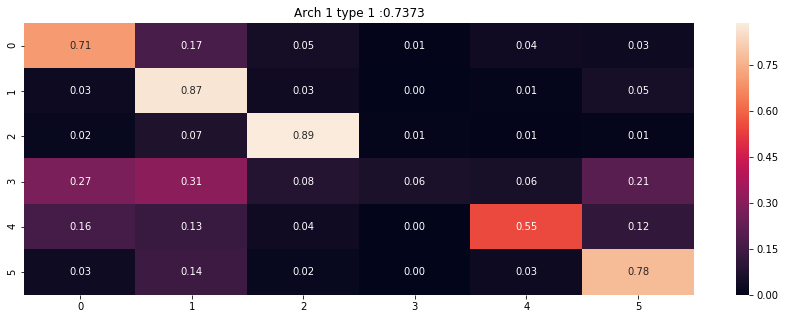

In [147]:
cm1 = summarize_net(model_1, X_test, y_test, title_text='Arch 1 type 1 :')

This is the visualization of this architecture, we can see that the model is doing badly classifying class 3 & 4

In [148]:
#save for further use
import pickle
h = open('model1.pickle','wb')
pickle.dump([history_1,model_1,c_1,pred_1,cm1],h)

In [149]:
import pickle
h = open('model1.pickle','rb')
results1 = pickle.load(h)
results1

 0.7373451327433629,
 array([1, 2, 1, ..., 2, 1, 5], dtype=int64),
 array([[0.70703125, 0.171875  , 0.04882812, 0.00585938, 0.03710938,
         0.02929688],
        [0.03095559, 0.87213997, 0.03499327, 0.0013459 , 0.00807537,
         0.05248991],
        [0.01875   , 0.07083333, 0.8875    , 0.00833333, 0.00625   ,
         0.00833333],
        [0.2745098 , 0.31372549, 0.08333333, 0.06372549, 0.05882353,
         0.20588235],
        [0.15966387, 0.13445378, 0.03781513, 0.        , 0.55042017,
         0.11764706],
        [0.03395062, 0.13888889, 0.02006173, 0.        , 0.0308642 ,
         0.77623457]])]

## Type 2 Architecture 1
### CNN

This is the same architecture 1 with changing tunning parameters.

In [150]:
def test_arch1_type2(X_train,X_test,y_train_ohe,y_test_ohe,v,e):
    NUM_CLASSES = n_classes
    cnn2 = Sequential()
    #cnn2.add(input_shape=(40,40,1))
    cnn2.add(Conv2D(filters=64, kernel_size= (5, 5), 
                    padding='same', input_shape=(40,40,1),
                    data_format="channels_last"))
    cnn2.add(Activation('relu'))
    cnn2.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
    # add one layer on flattened output
    cnn2.add(Flatten())
    cnn2.add(Dense(NUM_CLASSES, activation='softmax'))

    # Let's train the model 
    cnn2.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    # we need to exapnd the dimensions here to give the 
    #   "channels" dimension expected by Keras

    bath_size = 32
    history = cnn2.fit_generator(datagen.flow(X_train, y_train_ohe, batch_size=bath_size), 
                      steps_per_epoch=int(len(X_train)/bath_size), # how many generators to go through per epoch
                      epochs=e, verbose=v,
                      validation_data=(X_test,y_test_ohe),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=3)]
                     )
    pred = np.round(np.argmax(cnn2.predict(X_test),axis=1))
        #print(pred,y_test)
    #print (mt.confusion_matrix(np.round(np.argmax(y_test_ohe,axis =1)),pred))
    c = accuracy_score(np.round(np.argmax(y_test_ohe,axis =1)), pred)
    
    result = np.round(cnn2.predict(X_test))

    return history,cnn2,c,pred,result

In [151]:
history_1_type2,model_1_type2,c_1_type2,pred_1_type2,result = test_arch1_type2(X_train,X_test,y_train_ohe,y_test_ohe,1,10) # last two are verbose and epochs
#model_1.summary()

Epoch 1/10
353/353 [==============================] - 6s 18ms/step - loss: 1.4551 - acc: 0.4433 - val_loss: 1.2439 - val_acc: 0.5851
Epoch 2/10
353/353 [==============================] - 5s 13ms/step - loss: 1.1730 - acc: 0.5763 - val_loss: 0.9814 - val_acc: 0.6503
Epoch 3/10
353/353 [==============================] - 5s 13ms/step - loss: 1.0565 - acc: 0.6301 - val_loss: 0.8978 - val_acc: 0.6966
Epoch 4/10
353/353 [==============================] - 5s 14ms/step - loss: 0.9796 - acc: 0.6612 - val_loss: 0.8259 - val_acc: 0.7161
Epoch 5/10
353/353 [==============================] - 5s 14ms/step - loss: 0.9355 - acc: 0.6780 - val_loss: 0.8522 - val_acc: 0.7207
Epoch 6/10
353/353 [==============================] - 5s 13ms/step - loss: 0.9012 - acc: 0.6932 - val_loss: 0.7732 - val_acc: 0.7313
Epoch 7/10
353/353 [==============================] - 5s 13ms/step - loss: 0.8714 - acc: 0.7071 - val_loss: 0.7696 - val_acc: 0.7565
Epoch 8/10
353/353 [==============================] - 5s 13ms/step - 

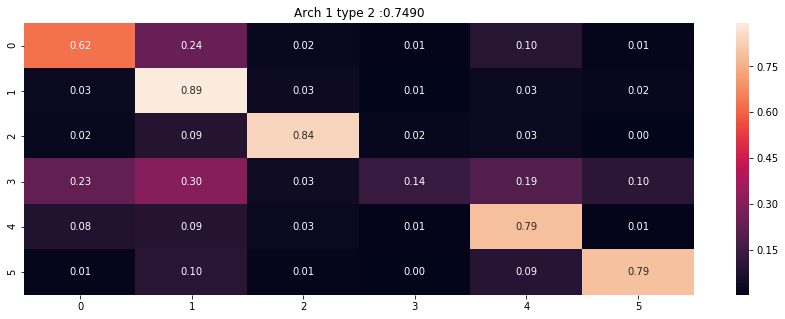

In [152]:
cm1_type2 = summarize_net(model_1_type2, X_test, y_test, title_text='Arch 1 type 2 :')

This is the visualization of this architecture, we can see that the model is doing badly classifying class 1 & 3

In [153]:
#save for further use
import pickle
h = open('model1type2.pickle','wb')
pickle.dump([history_1_type2,model_1_type2,c_1_type2,pred_1_type2,cm1_type2],h)

In [154]:
import pickle
h = open('model1type2.pickle','rb')
results1type2 = pickle.load(h)
results1type2

 0.7490265486725664,
 array([1, 2, 4, ..., 4, 1, 1], dtype=int64),
 array([[0.625     , 0.24023438, 0.02148438, 0.00585938, 0.09570312,
         0.01171875],
        [0.0282638 , 0.8923284 , 0.03230148, 0.00538358, 0.02557201,
         0.01615074],
        [0.02291667, 0.0875    , 0.84166667, 0.01666667, 0.02916667,
         0.00208333],
        [0.23039216, 0.30392157, 0.03431373, 0.1372549 , 0.19117647,
         0.10294118],
        [0.07983193, 0.08823529, 0.02521008, 0.00840336, 0.78991597,
         0.00840336],
        [0.00925926, 0.09722222, 0.00925926, 0.00308642, 0.08950617,
         0.79166667]])]

## K-fold for best model in architecture 1

For the best type of architecture one we have decided to use K-fold. Since simulation time high we have decided to use K-fold only on one of them to be able to finish the project on time. Since this model is doing well on all of the data we believe it is going to do better on part of data. We need to use K-fold to be sure our model is not over trained by seeing all the data and will do well on the actuall results. For each fold we have used 10 epoches because of simulation time.

In [155]:
# Module need for drawing ROC curve
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

Automatically created module for IPython interactive environment


In [157]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics as mt
costs_1 = []
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=64)
#temp_x = X_train[feature_cols].values
#temp_x = X_ints_train+ [X_train_num]+X_ints_test + [X_test_num]
#temp_y = np.array(y_train)
#print (temp_y)
#temp_y = np.array(temp_y)
#print (temp_x.shape)
#print (temp_y.shape)
ref = 1
#Create some variable to save each k-fold value
fpr_arch1 = []
tpr_arch1 = []
roc_auc_macro_arch1 = []
fpr_all_arch1 = []
tpr_all_arch1 = []
roc_auc_macro_all_arch1 = []
for train_idx, test_idx in kfold.split(X_train, y_train):
    print ('Now at step',ref,'in kfold ...')
    # build train and test samples from crossed cols and feature cols
    #print (y_train)
    X_train_temp = X_train[train_idx]
    y_train_temp = keras.utils.to_categorical(y_train[train_idx], n_classes)
    X_test_temp = X_train[test_idx]
    y_test_temp = keras.utils.to_categorical(y_train[test_idx], n_classes)
    #pred = np.argmax(model.predict(X_test_temp), axis=1)
    # take cost
    history,model,c,pred,result = test_arch1(X_train_temp,X_test_temp,y_train_temp,y_test_temp,1,10) # last two are verbose and epochs
    costs_1.append(c)
    # print confusion matrix
    print(mt.confusion_matrix(np.round(np.argmax(y_test_temp,axis =1)),pred), "=>", c)
    #ROC
    y_score =result ###specify the model we need here(I recommend to create a variable call result, which return the predict value of the model)
# Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_temp[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_temp.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    fpr_arch1.append(fpr["micro"])
    tpr_arch1.append(tpr["micro"])
    roc_auc_macro_arch1.append(roc_auc["micro"])
# Compute macro-average ROC curve and ROC area
    lw = 3
# First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    fpr_all_arch1.append(fpr["macro"])
    tpr_all_arch1.append(tpr["macro"])
    roc_auc_macro_all_arch1.append(roc_auc["macro"])
    ref+=1
print(costs_1)

Now at step 1 in kfold ...
Epoch 1/10
282/282 [==============================] - 5s 19ms/step - loss: 1.4378 - acc: 0.4450 - val_loss: 1.1824 - val_acc: 0.5652
Epoch 2/10
282/282 [==============================] - 3s 12ms/step - loss: 1.2356 - acc: 0.5563 - val_loss: 1.0954 - val_acc: 0.6487
Epoch 3/10
282/282 [==============================] - 3s 12ms/step - loss: 1.1579 - acc: 0.5949 - val_loss: 1.0189 - val_acc: 0.6350
Epoch 4/10
282/282 [==============================] - 3s 12ms/step - loss: 1.0953 - acc: 0.6148 - val_loss: 1.0901 - val_acc: 0.6337
Epoch 5/10
282/282 [==============================] - 3s 12ms/step - loss: 1.0580 - acc: 0.6319 - val_loss: 0.9701 - val_acc: 0.6681
Epoch 6/10
282/282 [==============================] - 3s 12ms/step - loss: 1.0128 - acc: 0.6520 - val_loss: 0.9458 - val_acc: 0.6880
Epoch 7/10
282/282 [==============================] - 3s 12ms/step - loss: 0.9970 - acc: 0.6592 - val_loss: 0.8693 - val_acc: 0.7114
Epoch 8/10
282/282 [======================

## Architecture 2

In [158]:
def test_arch2(X_train,X_test,y_train_ohe,y_test_ohe,v,e):
    NUM_CLASSES = n_classes
    cnn2 = Sequential()
    #cnn2.add(input_shape=(40,40,1))
    cnn2.add(Conv2D(filters=16, kernel_size= (3, 3), 
                    padding='same', input_shape=(40,40,1),
                    data_format="channels_last"))
    cnn2.add(Activation('relu'))
    
    cnn2.add(Conv2D(filters=32, kernel_size= (3, 3), 
                    padding='same', input_shape=(40,40,1),
                    data_format="channels_last"))
    cnn2.add(Activation('relu'))
    
    cnn2.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
    # add one layer on flattened output
    cnn2.add(Flatten())
    cnn2.add(Dense(NUM_CLASSES, activation='softmax'))

    # Let's train the model 
    cnn2.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    # we need to exapnd the dimensions here to give the 
    #   "channels" dimension expected by Keras

    bath_size = 32
    history = cnn2.fit_generator(datagen.flow(X_train, y_train_ohe, batch_size=bath_size), 
                      steps_per_epoch=int(len(X_train)/bath_size), # how many generators to go through per epoch
                      epochs=e, verbose=v,
                      validation_data=(X_test,y_test_ohe),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=3)]
                     )
    pred = np.round(np.argmax(cnn2.predict(X_test),axis=1))
        #print(pred,y_test)
    #print (mt.confusion_matrix(np.round(np.argmax(y_test_ohe,axis =1)),pred))
    c = accuracy_score(np.round(np.argmax(y_test_ohe,axis =1)), pred)
    
    result = cnn2.predict(X_test)
    


    return history,cnn2,c,pred,result

In [159]:
history_2,model_2,c_2,pred_2,result = test_arch2(X_train,X_test,y_train_ohe,y_test_ohe,1,10) # last two are verbose and epochs
#model_1.summary()

Epoch 1/10
353/353 [==============================] - 6s 17ms/step - loss: 1.2922 - acc: 0.5190 - val_loss: 0.9726 - val_acc: 0.6503
Epoch 2/10
353/353 [==============================] - 4s 12ms/step - loss: 1.0098 - acc: 0.6457 - val_loss: 0.9268 - val_acc: 0.6913
Epoch 3/10
353/353 [==============================] - 4s 12ms/step - loss: 0.9121 - acc: 0.6877 - val_loss: 0.7841 - val_acc: 0.7356
Epoch 4/10
353/353 [==============================] - 4s 12ms/step - loss: 0.8532 - acc: 0.7130 - val_loss: 0.7691 - val_acc: 0.7373
Epoch 5/10
353/353 [==============================] - 4s 12ms/step - loss: 0.7999 - acc: 0.7298 - val_loss: 0.6981 - val_acc: 0.7809
Epoch 6/10
353/353 [==============================] - 4s 12ms/step - loss: 0.7853 - acc: 0.7442 - val_loss: 0.6956 - val_acc: 0.7781
Epoch 7/10
353/353 [==============================] - 4s 12ms/step - loss: 0.7510 - acc: 0.7557 - val_loss: 0.6728 - val_acc: 0.7805
Epoch 8/10
353/353 [==============================] - 4s 12ms/step - 

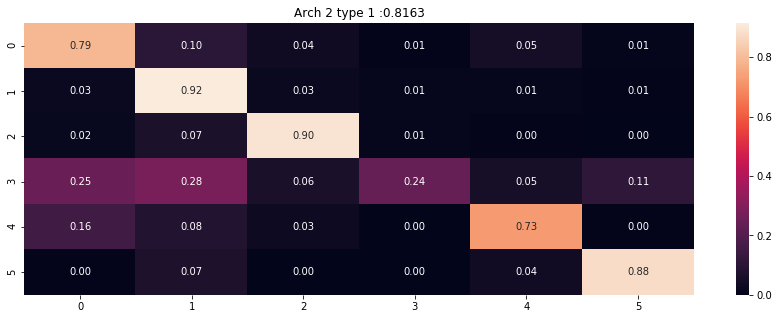

In [160]:
cm2 = summarize_net(model_2, X_test, y_test, title_text='Arch 2 type 1 :')

This is the visualization of this architecture, we can see that the model is doing badly classifying class 3

In [161]:
#save for further use
import pickle
h = open('model2.pickle','wb')
pickle.dump([history_2,model_2,c_2,pred_2,cm2],h)

In [162]:
import pickle
h = open('model2.pickle','rb')
results2 = pickle.load(h)
results2

 0.8162831858407079,
 array([1, 2, 4, ..., 0, 1, 5], dtype=int64),
 array([[0.79296875, 0.1015625 , 0.03710938, 0.00585938, 0.05273438,
         0.00976562],
        [0.0282638 , 0.91520861, 0.02557201, 0.01211306, 0.01211306,
         0.00672948],
        [0.02083333, 0.06666667, 0.89583333, 0.0125    , 0.00416667,
         0.        ],
        [0.25      , 0.27941176, 0.06372549, 0.24019608, 0.05392157,
         0.1127451 ],
        [0.15546218, 0.08403361, 0.02941176, 0.        , 0.72689076,
         0.00420168],
        [0.00462963, 0.07098765, 0.00308642, 0.00308642, 0.04166667,
         0.87654321]])]

## Type 2 architecture 2

Let's investigate architecture 2. With changing parameters of the same model following results are extracted.

In [163]:
def test_arch2_type2(X_train,X_test,y_train_ohe,y_test_ohe,v,e):
    NUM_CLASSES = n_classes
    cnn2 = Sequential()
    #cnn2.add(input_shape=(40,40,1))
    cnn2.add(Conv2D(filters=32, kernel_size= (5, 5), 
                    padding='same', input_shape=(40,40,1),
                    data_format="channels_last"))
    cnn2.add(Activation('relu'))
    
    cnn2.add(Conv2D(filters=64, kernel_size= (5, 5), 
                    padding='same', input_shape=(40,40,1),
                    data_format="channels_last"))
    cnn2.add(Activation('relu'))
    
    cnn2.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
    # add one layer on flattened output
    cnn2.add(Flatten())
    cnn2.add(Dense(NUM_CLASSES, activation='softmax'))

    # Let's train the model 
    cnn2.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    # we need to exapnd the dimensions here to give the 
    #   "channels" dimension expected by Keras

    bath_size = 32
    history = cnn2.fit_generator(datagen.flow(X_train, y_train_ohe, batch_size=bath_size), 
                      steps_per_epoch=int(len(X_train)/bath_size), # how many generators to go through per epoch
                      epochs=e, verbose=v,
                      validation_data=(X_test,y_test_ohe),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=3)]
                     )
    pred = np.round(np.argmax(cnn2.predict(X_test),axis=1))
        #print(pred,y_test)
    #print (mt.confusion_matrix(np.round(np.argmax(y_test_ohe,axis =1)),pred))
    c = accuracy_score(np.round(np.argmax(y_test_ohe,axis =1)), pred)

    result = cnn2.predict(X_test)
    return history,cnn2,c,pred,result

In [164]:
history_2_type2,model_2_type2,c_2_type2,pred_2_type2,reseult = test_arch2_type2(X_train,X_test,y_train_ohe,y_test_ohe,1,10) # last two are verbose and epochs
#model_1.summary()

Epoch 1/10
353/353 [==============================] - 8s 24ms/step - loss: 1.3308 - acc: 0.5100 - val_loss: 0.9653 - val_acc: 0.6581loss: 1.3674 -
Epoch 2/10
353/353 [==============================] - 6s 18ms/step - loss: 0.9856 - acc: 0.6623 - val_loss: 0.8025 - val_acc: 0.7363
Epoch 3/10
353/353 [==============================] - 6s 18ms/step - loss: 0.8493 - acc: 0.7218 - val_loss: 0.7081 - val_acc: 0.7781
Epoch 4/10
353/353 [==============================] - 6s 18ms/step - loss: 0.7810 - acc: 0.7431 - val_loss: 0.6900 - val_acc: 0.7862
Epoch 5/10
353/353 [==============================] - 6s 18ms/step - loss: 0.7207 - acc: 0.7627 - val_loss: 0.6192 - val_acc: 0.8106
Epoch 6/10
353/353 [==============================] - 7s 18ms/step - loss: 0.6972 - acc: 0.7760 - val_loss: 0.6672 - val_acc: 0.7862
Epoch 7/10
353/353 [==============================] - 6s 18ms/step - loss: 0.6743 - acc: 0.7840 - val_loss: 0.5964 - val_acc: 0.8120
Epoch 8/10
353/353 [==============================] - 7

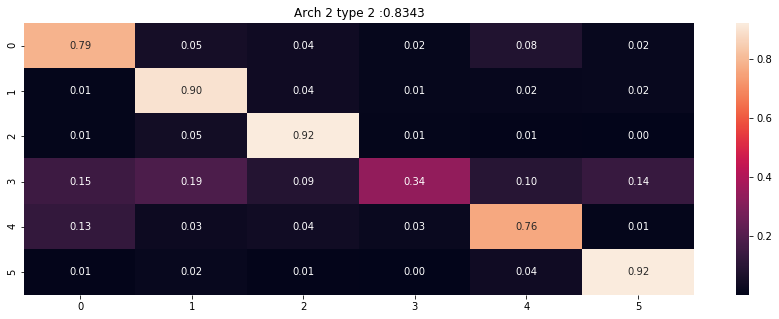

In [165]:
cm2_type2 = summarize_net(model_2_type2, X_test, y_test, title_text='Arch 2 type 2 :')

This is the visualization of this architecture, we can see that the model is doing badly classifying class 3

In [166]:
#save for further use
import pickle
h = open('model2type2.pickle','wb')
pickle.dump([history_2_type2,model_2_type2,c_2_type2,pred_2_type2,cm2_type2],h)

In [167]:
import pickle
h = open('model2type2.pickle','rb')
results2type2 = pickle.load(h)
results2type2

 0.8343362831858407,
 array([1, 2, 4, ..., 3, 1, 5], dtype=int64),
 array([[0.78515625, 0.05273438, 0.04101562, 0.015625  , 0.08203125,
         0.0234375 ],
        [0.00942127, 0.89771198, 0.03903096, 0.01480485, 0.01749664,
         0.02153432],
        [0.01041667, 0.04791667, 0.92083333, 0.0125    , 0.00625   ,
         0.00208333],
        [0.15196078, 0.18627451, 0.08823529, 0.33823529, 0.09803922,
         0.1372549 ],
        [0.12605042, 0.03361345, 0.04201681, 0.02521008, 0.7605042 ,
         0.01260504],
        [0.00771605, 0.02006173, 0.00771605, 0.00462963, 0.04012346,
         0.91975309]])]

## K-fold for best model in architecture 2

In [168]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics as mt

costs_2 = []
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=64)
#temp_x = X_train[feature_cols].values
#temp_x = X_ints_train+ [X_train_num]+X_ints_test + [X_test_num]
#temp_y = np.array(y_train)
#print (temp_y)
#temp_y = np.array(temp_y)
#print (temp_x.shape)
#print (temp_y.shape)
ref = 1

#Create some variable to save each k-fold value

fpr_arch2 = []
tpr_arch2 = []
roc_auc_macro_arch2 = []

fpr_all_arch2 = []
tpr_all_arch2 = []
roc_auc_macro_all_arch2 = []


for train_idx, test_idx in kfold.split(X_train, y_train):
    print ('Now at step',ref,'in kfold ...')
    # build train and test samples from crossed cols and feature cols
    #print (y_train)
    
    X_train_temp = X_train[train_idx]
    y_train_temp = keras.utils.to_categorical(y_train[train_idx], n_classes)
    X_test_temp = X_train[test_idx]
    y_test_temp = keras.utils.to_categorical(y_train[test_idx], n_classes)
    
    #pred = np.argmax(model.predict(X_test_temp), axis=1)
    
    # take cost
    history,model,c,pred,result = test_arch2_type2(X_train_temp,X_test_temp,y_train_temp,y_test_temp,1,10) # last two are verbose and epochs
    costs_2.append(c)
    
    
    y_score = result
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_temp[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_temp.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    fpr_arch2.append(fpr["micro"])
    tpr_arch2.append(tpr["micro"])
    roc_auc_macro_arch2.append(roc_auc["micro"])


# Compute macro-average ROC curve and ROC area
    lw = 3
# First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    fpr_all_arch2.append(fpr["macro"])
    tpr_all_arch2.append(tpr["macro"])
    roc_auc_macro_all_arch2.append(roc_auc["macro"])
    
    
    # print confusion matrix
    print(mt.confusion_matrix(np.round(np.argmax(y_test_temp,axis =1)),pred), "=>", c)
    ref+=1

print(costs_2)

Now at step 1 in kfold ...
Epoch 1/10
282/282 [==============================] - 7s 25ms/step - loss: 1.4466 - acc: 0.4609 - val_loss: 1.0038 - val_acc: 0.6323
Epoch 2/10
282/282 [==============================] - 5s 18ms/step - loss: 1.0631 - acc: 0.6237 - val_loss: 0.8511 - val_acc: 0.7190
Epoch 3/10
282/282 [==============================] - 5s 18ms/step - loss: 0.9690 - acc: 0.6767 - val_loss: 0.7718 - val_acc: 0.7441
Epoch 4/10
282/282 [==============================] - 5s 19ms/step - loss: 0.8721 - acc: 0.7100 - val_loss: 0.7383 - val_acc: 0.7649
Epoch 5/10
282/282 [==============================] - 5s 19ms/step - loss: 0.8273 - acc: 0.7345 - val_loss: 0.6760 - val_acc: 0.7923
Epoch 6/10
282/282 [==============================] - 5s 18ms/step - loss: 0.7686 - acc: 0.7497 - val_loss: 0.7986 - val_acc: 0.7327
Epoch 7/10
282/282 [==============================] - 5s 18ms/step - loss: 0.7477 - acc: 0.7551 - val_loss: 0.7290 - val_acc: 0.7530
Epoch 8/10
282/282 [======================

In [169]:
#save for further use
import pickle
h = open('costs.pickle','wb')
pickle.dump([costs_1,costs_2],h)

In [170]:
import pickle
h = open('costs.pickle','rb')
results = pickle.load(h)
results

[[0.7048166151126822,
  0.7085360459973463,
  0.7123893805309734,
  0.7196634189548273,
  0.7514399645547186],
 [0.8192664604507292,
  0.7987616099071208,
  0.8048672566371682,
  0.8241806908768822,
  0.8289765175011077]]

## Architecture 3

### Ensemble net

In [28]:
def ensemble_net(X_train,X_test,y_train_ohe,y_test_ohe,v,e):
    num_ensembles = 2
    l2_lambda = 0.0001

    img_wh = h
    NUM_CLASSES = n_classes

    input_holder = Input(shape=(img_wh, img_wh, channels))

    # start with a conv layer
    x = Conv2D(filters=32,
                   input_shape = (img_wh,img_wh,channels),
                   kernel_size=(3,3),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu', data_format="channels_last")(input_holder)

    """x = Conv2D(filters=32,
                   kernel_size=(3,3),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu')(x)"""
    input_conv = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

    branches = []
    for _ in range(num_ensembles):

        # start using NiN (MLPConv)
        x = Conv2D(filters=32,
                       input_shape = (img_wh,img_wh,1),
                       kernel_size=(3,3),
                       kernel_initializer='he_uniform', 
                       kernel_regularizer=l2(l2_lambda),
                       padding='same', 
                       activation='linear', data_format="channels_last")(input_conv)

        """x = Conv2D(filters=32,
                       kernel_size=(1,1),
                       kernel_initializer='he_uniform', 
                       kernel_regularizer=l2(l2_lambda),
                       padding='same', 
                       activation='relu', data_format="channels_last")(x)"""

        x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

        x = Conv2D(filters=64,
                       input_shape = (img_wh,img_wh,1),
                       kernel_size=(3,3),
                       kernel_initializer='he_uniform', 
                       kernel_regularizer=l2(l2_lambda),
                       padding='same', 
                       activation='linear', data_format="channels_last")(x)

        """x = Conv2D(filters=64,
                       kernel_size=(1,1),
                       kernel_initializer='he_uniform', 
                       kernel_regularizer=l2(l2_lambda),
                       padding='same', 
                       activation='linear', data_format="channels_last")(x)"""

        x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

        # add one layer on flattened output
        x = Flatten()(x)
        x = Dropout(0.50)(x) # add some dropout for regularization after conv layers
        x = Dense(64, 
                  activation='relu',
                  kernel_initializer='he_uniform',
                  kernel_regularizer=l2(l2_lambda)
                )(x)

        x = Dense(NUM_CLASSES, 
                  activation='relu',
                  kernel_initializer='he_uniform',
                  kernel_regularizer=l2(l2_lambda)
                 )(x)

        # now add this branch onto the master list
        branches.append(x)

    # that's it, we just need to average the results
    x = concatenate(branches)

    x = Dense(NUM_CLASSES, 
              activation='softmax', 
              kernel_initializer='glorot_uniform',
              kernel_regularizer=l2(l2_lambda)
             )(x)

    # here is the secret sauce for setting the network using the 
    #   Functional API:
    cnn_ens = Model(inputs=input_holder,outputs=x)

    #cnn_ens.summary()

    cnn_ens.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                    optimizer='adam', # 'adadelta' 'rmsprop'
                    metrics=['accuracy'])
    '''
    history = cnn_ens.fit(X_train, y_train_ohe, batch_size=128, 
                          epochs=e, verbose=v,
                          validation_data=(X_test,y_test_ohe),
                          callbacks=[EarlyStopping(monitor='val_loss', patience=3)]
                         )
    '''
    
    bath_size = 32
    history = cnn_ens.fit_generator(datagen.flow(X_train, y_train_ohe, batch_size=bath_size), 
                      steps_per_epoch=int(len(X_train)/bath_size), # how many generators to go through per epoch
                      epochs=e, verbose=v,
                      validation_data=(X_test,y_test_ohe),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=3)]
                     )
    pred = np.round(np.argmax(cnn_ens.predict(X_test),axis=1))
        #print(pred,y_test)
    c = accuracy_score(np.round(np.argmax(y_test_ohe,axis =1)), pred)

    return history,cnn_ens,c,pred

In [29]:
history_3,model_3,c_3,pred_3 = ensemble_net(X_train,X_test,y_train_ohe,y_test_ohe,1,5) # last two are verbose and epochs
#model_1.summary()

Epoch 1/5
353/353 [==============================] - 24s 69ms/step - loss: 1.8313 - acc: 0.2570 - val_loss: 1.7943 - val_acc: 0.2542
Epoch 2/5
353/353 [==============================] - 21s 60ms/step - loss: 1.7775 - acc: 0.2568 - val_loss: 1.7614 - val_acc: 0.2542
Epoch 3/5
353/353 [==============================] - 21s 60ms/step - loss: 1.7538 - acc: 0.2586 - val_loss: 1.7445 - val_acc: 0.2542
Epoch 4/5
353/353 [==============================] - 21s 60ms/step - loss: 1.7404 - acc: 0.2583 - val_loss: 1.7337 - val_acc: 0.2542
Epoch 5/5
353/353 [==============================] - 21s 61ms/step - loss: 1.7323 - acc: 0.2590 - val_loss: 1.7258 - val_acc: 0.2542


array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

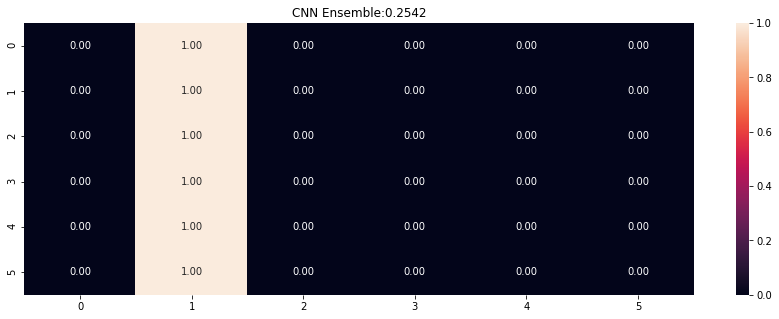

In [30]:
summarize_net(model_3, X_test, y_test, title_text='CNN Ensemble:')

We tried to use Ensemble net and the confusion matrix was giving the output for 1 class only and we think because the architecture is too deep and the number of samples is low. So it's probably stuck in a local minima?

### Ploting loss and accuracy

In [172]:
print (history_2.history)

{'val_loss': [0.9725745884718093, 0.9268449973216099, 0.7840567394695451, 0.7691231582439051, 0.6980662728621896, 0.695565339316309, 0.6727924265798214, 0.6189129976255704, 0.6135809572186091, 0.5937407546866257], 'val_acc': [0.6502654868100597, 0.6913274336916155, 0.735575221323334, 0.7373451328277588, 0.7808849557944104, 0.7780530974084298, 0.7805309734724264, 0.8099115044458778, 0.8088495575221238, 0.8162831858618069], 'loss': [1.2922313699641241, 1.0109719996064244, 0.9123821880195921, 0.8529142526944591, 0.8014151642263184, 0.7848381667739383, 0.7498320321430698, 0.7209118364802521, 0.719174010350307, 0.689013714619656], 'acc': [0.5190332861189801, 0.6456022011236003, 0.6877607171438364, 0.7131445815265469, 0.7291204402236621, 0.7443862607668061, 0.7568119286438095, 0.7637348007455401, 0.7663086890973289, 0.780065678530221]}


Text(0.5,0,'epochs')

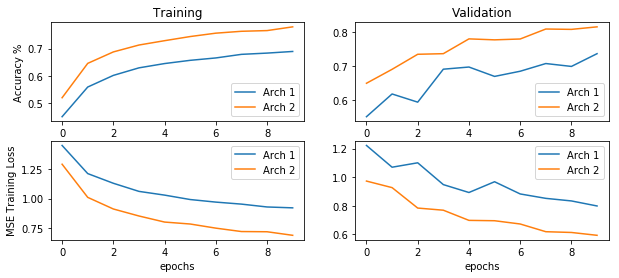

In [173]:
from matplotlib import pyplot as plt

%matplotlib inline

legends=['Arch 1','Arch 2','Arch 3']
plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history_1.history['acc'])
plt.plot(history_2.history['acc'])
#plt.plot(history_3.history['acc'])
plt.legend(legends)

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history_1.history['val_acc'])
plt.plot(history_2.history['val_acc'])
#plt.plot(history_3.history['val_acc'])
plt.legend(legends)
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history_1.history['loss'])
plt.plot(history_2.history['loss'])
#plt.plot(history_3.history['loss'])
plt.ylabel('MSE Training Loss')
plt.legend(legends)
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history_1.history['val_loss'])
plt.plot(history_2.history['val_loss'])
#plt.plot(history_3.history['val_loss'])
plt.legend(legends)
plt.xlabel('epochs')

### ROC comparision

Logistic_regression : 0.6038938053097345


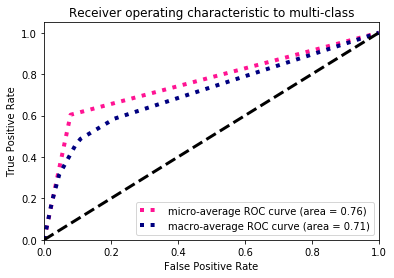

MLP : 0.6056637168141593


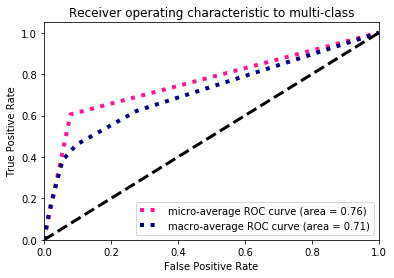

Random_forest : 0.7869026548672566


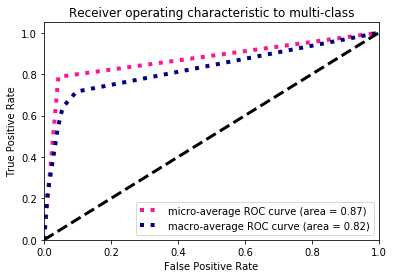

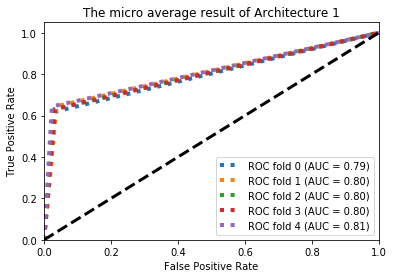

The average ROC is: 0.8010661688338349


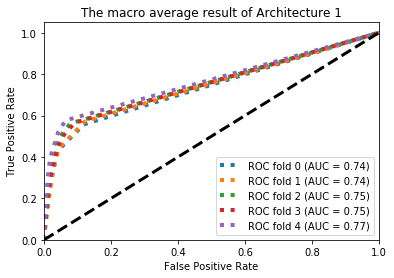

The average ROC is: 0.7481528418952379


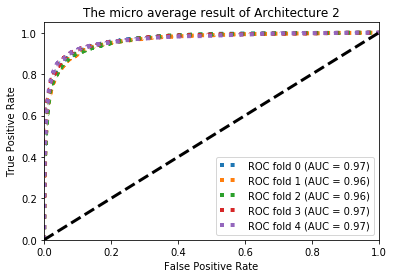

The average ROC is: 0.9648493537069864


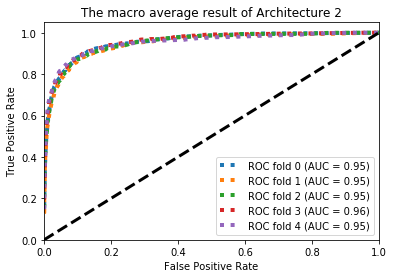

The average ROC is: 0.9523605620339646


In [174]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
mods = [LR(), MLP(), RF(n_estimators = 100)]
dic = {1:'Logistic_regression',2:'MLP',3:'Random_forest'}
count = 1
for mod in mods:
    mod.fit(X_train.reshape((-1,40*40)),y_train)
    y_pred = mod.predict(X_test.reshape((-1,40*40)))
    #print (y_pred)
    print (dic[count],':',accuracy_score(y_test,y_pred ))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    y_test1 = keras.utils.to_categorical(y_test, n_classes) 
    y_score = keras.utils.to_categorical(y_pred, n_classes)
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()
    count+=1
    
for i in range(len(fpr_arch1)):
    plt.plot(fpr_arch1[i], tpr_arch1[i],
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc_macro_arch1[i]),
              linestyle=':', linewidth=4)


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The micro average result of Architecture 1')
plt.legend(loc="lower right")
plt.show()
print("The average ROC is:" ,np.mean(roc_auc_macro_arch1))
for i in range(len(fpr_all_arch1)):
    plt.plot(fpr_all_arch1[i], tpr_all_arch1[i],
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc_macro_all_arch1[i]),
              linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The macro average result of Architecture 1')
plt.legend(loc="lower right")
plt.show()
print("The average ROC is:" ,np.mean(roc_auc_macro_all_arch1))
for i in range(len(fpr_arch2)):
    plt.plot(fpr_arch2[i], tpr_arch2[i],
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc_macro_arch2[i]),
              linestyle=':', linewidth=4)


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The micro average result of Architecture 2')
plt.legend(loc="lower right")
plt.show()
print("The average ROC is:" ,np.mean(roc_auc_macro_arch2))
for i in range(len(fpr_all_arch2)):
    plt.plot(fpr_all_arch2[i], tpr_all_arch2[i],
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc_macro_all_arch2[i]),
              linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The macro average result of Architecture 2')
plt.legend(loc="lower right")
plt.show()

print("The average ROC is:" ,np.mean(roc_auc_macro_all_arch2))

Base on the ROC result, the Architecutere 2 type 2 is performing the best (Micro Average ROC: 0.965 Macro Average ROC: 0.952)

## Transfer learning

In this part we are using pre-trained model to predict outputs. Since CNN inner layers are suppose to extract features from our data and this feature extraction is similar for different objectives. That is, we can use a layer at the output of this model to train final layer depending on our output. This will decrease our simulation time and will help us to get better measurement of success in less time.

In [175]:
print(X_train.shape)
y_train = y_train.reshape((-1,1))
print(y_train.shape)
print(X_test.shape)
y_test = y_test.reshape((-1,1))
print(y_test.shape)

(11299, 40, 40, 1)
(11299, 1)
(2825, 40, 40, 1)
(2825, 1)


In [176]:
def gray2rgb(gray):
    a,b,c = gray.shape
    #print (a,b,c)
    if c!=1 :
        raise Exception("Not gray scale")
    #print (a,b,c)
    r = 0.2989 * gray
    g = 0.5870 * gray
    b = 0.1140 * gray
    st = np.stack((r,g,b))
    #print (st.shape)
    return st.reshape(40,40,3)

In [177]:
X_rgb = []
for i in X_train:
    X_rgb.append(gray2rgb(i))
X_rgb = np.array(X_rgb)
X_train_rgb = X_rgb.reshape((-1,n_features_x,n_features_y,3))
print (X_train_rgb.shape)
X_rgb = []
for i in X_test:
    X_rgb.append(gray2rgb(i))
X_rgb = np.array(X_rgb)
X_test_rgb = X_rgb.reshape((-1,n_features_x,n_features_y,3))
print (X_test_rgb.shape)

(11299, 40, 40, 3)
(2825, 40, 40, 3)


In [178]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from scipy.misc import imresize
# load only convolutional layers of resnet:
if 'res_no_top' not in locals():
    res_no_top = ResNet50(weights='imagenet', include_top=False)

x_train_up = [imresize(x, size=(64,64,3), interp='nearest') for x in X_train_rgb]
x_train_up = np.stack(x_train_up, axis=0)
print(x_train_up.shape)

x_test_up = [imresize(x, size=(64,64,3), interp='nearest') for x in X_test_rgb]
x_test_up = np.stack(x_test_up, axis=0)
print(x_test_up.shape)
    
x_train_up = preprocess_input(x_train_up)
x_test_up = preprocess_input(x_test_up)

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


(11299, 64, 64, 3)


C:\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if sys.path[0] == '':


(2825, 64, 64, 3)


In [179]:
# train on the data
x_train_resnet = res_no_top.predict(x_train_up)
x_test_resnet = res_no_top.predict(x_test_up)
print(x_train_resnet.shape)

(11299, 2, 2, 2048)


In [180]:
from keras.layers import SeparableConv2D
from keras.layers.normalization import BatchNormalization
from keras.layers import Add, Flatten, Dense
from keras.layers import average, concatenate
from keras.models import Input, Model
# let's add a fully-connected layer
input_x = Input(shape=x_train_resnet[0].shape)
x = Flatten()(input_x)
x = Dense(200, activation='relu',kernel_initializer='he_uniform')(x)
# and a fully connected layer 
predictions = Dense(n_classes, activation='softmax', kernel_initializer='glorot_uniform')(x)

model = Model(inputs=input_x, outputs=predictions)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 2, 2, 2048)        0         
_________________________________________________________________
flatten_43 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_44 (Dense)             (None, 200)               1638600   
_________________________________________________________________
dense_45 (Dense)             (None, 6)                 1206      
Total params: 1,639,806
Trainable params: 1,639,806
Non-trainable params: 0
_________________________________________________________________


In [201]:
y_train_ohe_resnet = y_train_ohe[:x_train_resnet.shape[0]]

model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train_resnet,y_train_ohe_resnet,epochs=10,
          batch_size=64,verbose=1,
         validation_data=(x_test_resnet, y_test_ohe[:x_test_resnet.shape[0]]))

Train on 11299 samples, validate on 2825 samples
Epoch 1/10
11299/11299 [==============================] - 4s 390us/step - loss: 0.3650 - acc: 0.8809 - val_loss: 0.7824 - val_acc: 0.7816
Epoch 2/10
11299/11299 [==============================] - 2s 171us/step - loss: 0.3357 - acc: 0.8886 - val_loss: 0.6691 - val_acc: 0.8244
Epoch 3/10
11299/11299 [==============================] - 2s 171us/step - loss: 0.3030 - acc: 0.8998 - val_loss: 0.6165 - val_acc: 0.8258
Epoch 4/10
11299/11299 [==============================] - 2s 170us/step - loss: 0.2793 - acc: 0.9080 - val_loss: 0.7070 - val_acc: 0.8057
Epoch 5/10
11299/11299 [==============================] - 2s 172us/step - loss: 0.2700 - acc: 0.9072 - val_loss: 0.6648 - val_acc: 0.8283
Epoch 6/10
11299/11299 [==============================] - 2s 171us/step - loss: 0.2502 - acc: 0.9142 - val_loss: 0.6816 - val_acc: 0.8092
Epoch 7/10
11299/11299 [==============================] - 2s 172us/step - loss: 0.2247 - acc: 0.9242 - val_loss: 0.7772 - v

array([[0.79882812, 0.03710938, 0.05859375, 0.04492188, 0.04882812,
        0.01171875],
       [0.00672948, 0.88829071, 0.03768506, 0.04845222, 0.01345895,
        0.00538358],
       [0.00208333, 0.02083333, 0.9625    , 0.0125    , 0.00208333,
        0.        ],
       [0.10784314, 0.14215686, 0.18627451, 0.50490196, 0.02941176,
        0.02941176],
       [0.07563025, 0.05462185, 0.02941176, 0.05462185, 0.77310924,
        0.01260504],
       [0.01388889, 0.10185185, 0.03703704, 0.08950617, 0.06635802,
        0.69135802]])

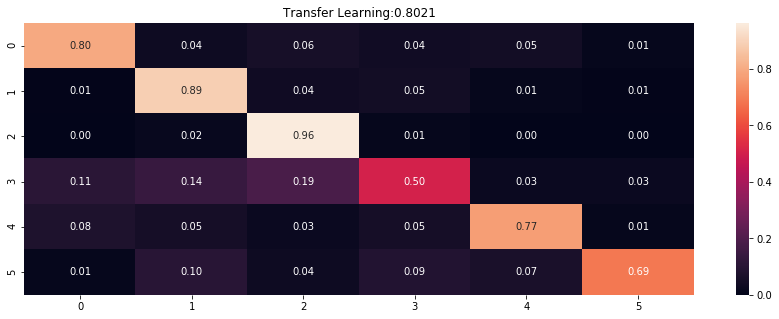

In [196]:
summarize_net(model, x_test_resnet, y_test[:x_test_resnet.shape[0]], title_text='Transfer Learning:')


This is the visualization of this architecture, we can see that the model is doing badly classifying class 3

In [235]:
pred_transfer = np.round(np.argmax(model.predict(x_test_resnet),axis=1))

# MLP

In [183]:
from sklearn.neural_network import MLPClassifier
sk_mlp = MLPClassifier(hidden_layer_sizes=(100,), 
                       solver='lbfgs', 
                       learning_rate_init=0.01, 
                       max_iter=120, 
                       random_state=1)



from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

nsamples, nx, ny, ch = X_train.shape
X_train1 = X_train.reshape((nsamples,nx*ny))

nsamples, nx, ny, ch = X_test.shape
X_test1 = X_test.reshape((nsamples,nx*ny))
print(X_test1.shape)
print(X_train1.shape)
sk_mlp.fit(X_train1, y_train)
pred_mlp = sk_mlp.predict(X_test1)

# take cost
c_mlp = accuracy_score(y_test, pred_mlp)
c_mlp

(2825, 1600)
(11299, 1600)


C:\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6024778761061947

# Statistical Comparison

The McNemar’s test operates upon a contingency table.


A contingency table is a tabulation or count of two categorical variables. In the case of the McNemar’s test, we are interested in binary variables correct/incorrect or yes/no for a control and a treatment or two cases. This is called a 2×2 contingency table.


The statistical concepts

McNemar's test statistic (Chi-Squared test) has a null hypothesis of the 2 models are statistically insignificant and the alternative hypothesis is that they are statistically different.

We assume 95% confidence then alpha = 0.05 we can compute the p-value assuming that the null hypothesis is true, the p-value is the probability of observing this empirical (or a larger) chi-squared value. If the p-value is lower than our chosen significance level, we can reject the null hypothesis that the two model's performances are equal.

In [190]:
#contingency table
#between pred_1 and pred_1_type2

import numpy as np
from mlxtend.evaluate import mcnemar_table

# The correct target (class) labels
y_target = y_test.ravel()

# Class labels predicted by model 1
y_model1 = pred_1
# Class labels predicted by model 2
y_model2 = pred_1_type2
tb = mcnemar_table(y_target=y_target, 
                   y_model1=y_model1, 
                   y_model2=y_model2)

print(tb)
#McNimar's test
from mlxtend.evaluate import mcnemar

chi2, p = mcnemar(ary=tb, corrected=True)
print('chi-squared:', chi2)
print('p-value:', p)
#this means they are the same

[[1913  203]
 [ 170  539]]
chi-squared: 2.745308310991957
p-value: 0.09754026181681195


In [191]:
#contingency table
#between pred_2 and pred_2_type2

import numpy as np
from mlxtend.evaluate import mcnemar_table


# Class labels predicted by model 1
y_model1 = pred_2
# Class labels predicted by model 2
y_model2 = pred_2_type2
tb = mcnemar_table(y_target=y_target, 
                   y_model1=y_model1, 
                   y_model2=y_model2)

print(tb)
#McNimar's test
from mlxtend.evaluate import mcnemar

chi2, p = mcnemar(ary=tb, corrected=True)
print('chi-squared:', chi2)
print('p-value:', p)
#pred_2_type2

[[2208  149]
 [  98  370]]
chi-squared: 10.121457489878543
p-value: 0.0014655306283153278


In [239]:
#contingency table
#between pred_1 and pred_2_type2

import numpy as np
from mlxtend.evaluate import mcnemar_table


# Class labels predicted by model 1
y_model1 = pred_1_type2
# Class labels predicted by model 2
y_model2 = pred_2_type2
tb = mcnemar_table(y_target=y_target, 
                   y_model1=y_model1, 
                   y_model2=y_model2)

print(tb)
#McNimar's test
from mlxtend.evaluate import mcnemar

chi2, p = mcnemar(ary=tb, corrected=True)
print('chi-squared:', chi2)
print('p-value:', p)
#pred_2_type2

[[2048  309]
 [  68  400]]
chi-squared: 152.78514588859417
p-value: 4.268046725170864e-35


In [193]:
#contingency table
#between pred_mlp and pred_2_type2

import numpy as np
from mlxtend.evaluate import mcnemar_table


# Class labels predicted by model 1
y_model1 = pred_2_type2
# Class labels predicted by model 2
y_model2 = pred_mlp
tb = mcnemar_table(y_target=y_target, 
                   y_model1=y_model1, 
                   y_model2=y_model2)

print(tb)
#McNimar's test
from mlxtend.evaluate import mcnemar

chi2, p = mcnemar(ary=tb, corrected=True)
print('chi-squared:', chi2)
print('p-value:', p)
#pred_2_type2 is better

[[1607   95]
 [ 750  373]]
chi-squared: 506.17278106508877
p-value: 4.314336497447508e-112


In [238]:
#contingency table
#between pred_transfer and pred_2_type2

import numpy as np
from mlxtend.evaluate import mcnemar_table


# Class labels predicted by model 1
y_model1 = pred_2_type2
# Class labels predicted by model 2
y_model2 = pred_transfer
tb = mcnemar_table(y_target=y_target, 
                   y_model1=y_model1, 
                   y_model2=y_model2)

print(tb)
#McNimar's test
from mlxtend.evaluate import mcnemar

chi2, p = mcnemar(ary=tb, corrected=True)
print('chi-squared:', chi2)
print('p-value:', p)
#pred_2_type2 is slightly better

[[2093  219]
 [ 264  249]]
chi-squared: 4.008281573498965
p-value: 0.045277276325775266


For Architecture 1 we compare between type 1 and type 2 and type 2 is better and statistically different
For Architecture 2 we compare between type 1 and type 2 and type 2 is better and statistically different
After that we compare Architecture 2 part 2 with Architecture 1 type 2 and Architecture 2 type 2 is better and significantly different
After that we compare Architecture 2 part 2 with MLP and Architecture 2 part 2 is better and statistically different
After that we compare Architecture 2 part 2 with transfer learning and Architecture 2 part 2 is statitically significant

# Conclusion

We decide that Architecture 2 part 2 is the best model with 83.4% better than our baseline (17%) and our excpectation (70%) so we decide to deploy this model for production to find cool planktons in the ocean! :P

# Reference

<ol><li>National Data Science Bowl in Kaggle: https://www.kaggle.com/c/datasciencebowl</li>
    <li>Class notebooks: https://github.com/eclarson/MachineLearningNotebooks</li>
</ol>